# Presenting Data in Multiple Ways

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# World Cup Data (1930 - 2014)

In [3]:
df1 = pd.read_csv('fifa-world-cup/WorldCupMatches.csv')
df2 = pd.read_csv('fifa-world-cup/WorldCupPlayers.csv')
df3 = pd.read_csv('fifa-world-cup/WorldCups.csv')

In [4]:
printmd('**DF1:**')
print(df1.describe().loc[['count','max']])
printmd('**DF1 Categorical:**')
print(df1.describe(include=['O']).loc[['top']])
printmd('**DF2:**')
print(df2.describe().loc[['count','max']])
printmd('**DF2 Categorical:**')
print(df2.describe(include=['O']).loc[['top']])
printmd('**DF3:**')
print(df3.describe().loc[['count','max']])
printmd('**DF3 Categorical:**')
print(df3.describe(include=['O']).loc[['top']])

**DF1:**

         Year  Home Team Goals  Away Team Goals  Attendance  \
count   852.0            852.0            852.0       850.0   
max    2014.0             10.0              7.0    173850.0   

       Half-time Home Goals  Half-time Away Goals     RoundID      MatchID  
count                 852.0                 852.0       852.0        852.0  
max                     6.0                   5.0  97410600.0  300186515.0  


**DF1 Categorical:**

                 Datetime        Stage         Stadium          City  \
top  27 May 1934 - 16:30   Round of 16  Estadio Azteca  Mexico City    

    Home Team Name Away Team Name Win conditions                Referee  \
top         Brazil         Mexico                 Ravshan IRMATOV (UZB)   

              Assistant 1               Assistant 2 Home Team Initials  \
top  VERGARA Hector (CAN)  KOCHKAROV Bakhadyr (KGZ)                BRA   

    Away Team Initials  
top                MEX  


**DF2:**

          RoundID      MatchID  Shirt Number
count     37784.0      37784.0       37784.0
max    97410600.0  300186515.0          23.0


**DF2 Categorical:**

    Team Initials                 Coach Name Line-up Player Name Position  \
top           BRA  SCOLARI Luiz Felipe (BRA)       N     RONALDO       GK   

     Event  
top  OH46'  


**DF3:**

         Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.0         20.0            20.0           20.0
max    2014.0        171.0            32.0           64.0


**DF3 Categorical:**

     Country  Winner Runners-Up    Third   Fourth Attendance
top  Germany  Brazil  Argentina  Germany  Uruguay  2.394.031


# Video Game Data

In [5]:
df4 = pd.read_csv('vgsales.csv')

In [6]:
printmd('**DF4:**')
print(df4.describe().loc[['count','max']])
printmd('**DF4 Categorical:**')
print(df4.describe(include=['O']).loc[['top']])

**DF4:**

          Rank     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count  16598.0  16327.0  16598.00  16598.00  16598.00     16598.00   
max    16600.0   2020.0     41.49     29.02     10.22        10.57   

       Global_Sales  
count      16598.00  
max           82.74  


**DF4 Categorical:**

                            Name Platform   Genre        Publisher
top  Need for Speed: Most Wanted       DS  Action  Electronic Arts


# Student Alcohol Consumption Data

In [7]:
df_stu = pd.read_csv('student-mat.csv')

In [8]:
printmd('**df_stu:**')
print(df_stu.describe().loc[['count','max']])
printmd('**df_stu Categorical:**')
print(df_stu.describe(include=['O']).loc[['top']])

**df_stu:**

         age   Medu   Fedu  traveltime  studytime  failures  famrel  freetime  \
count  395.0  395.0  395.0       395.0      395.0     395.0   395.0     395.0   
max     22.0    4.0    4.0         4.0        4.0       3.0     5.0       5.0   

       goout   Dalc   Walc  health  absences     G1     G2     G3  
count  395.0  395.0  395.0   395.0     395.0  395.0  395.0  395.0  
max      5.0    5.0    5.0     5.0      75.0   19.0   19.0   20.0  


**df_stu Categorical:**

    school sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
top     GP   F       U     GT3       T  other  other  course   mother   

    schoolsup famsup paid activities nursery higher internet romantic  
top        no    yes   no        yes     yes    yes      yes       no  


# -------------------------------------------------------------------

# 1. Four - One Variable (World Cup Data)

### 1.1 Histogram - Distribution of Match Goals

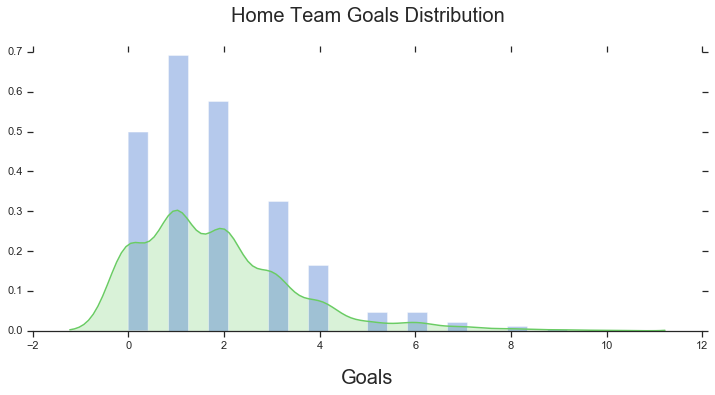

In [9]:
sns.set(style='white', palette='muted', color_codes=True)
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('Home Team Goals Distribution', y=1.09)

axes = sns.distplot(df1['Home Team Goals'].dropna(), hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.xlabel('Goals', labelpad=18)

sns.despine(left=True)

### Pros & Cons
+ Pros: There are a lot visual controls here.
- Cons: The information represented is somewhat limited.

### 1.2 Boxplot - Goals Scored

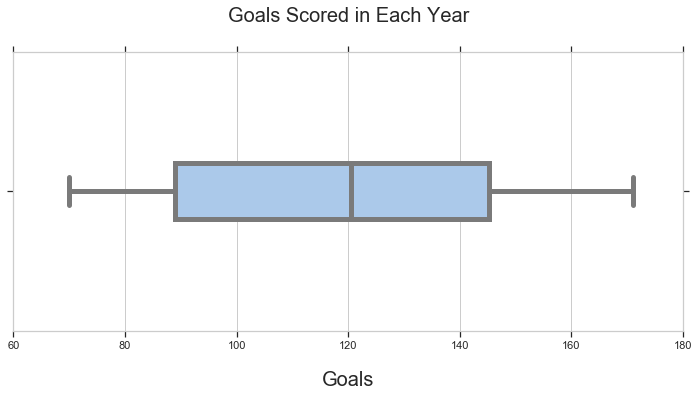

In [10]:
sns.set_style('whitegrid')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=df3['GoalsScored'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('Goals', labelpad=20)
plt.title('Goals Scored in Each Year', y=1.09)

### Pros & Cons
+ Pros: The information being conveyed is easily understood.
- Cons: There is little context without additional variables.

### 1.3 Density Plot - Half-time Goals

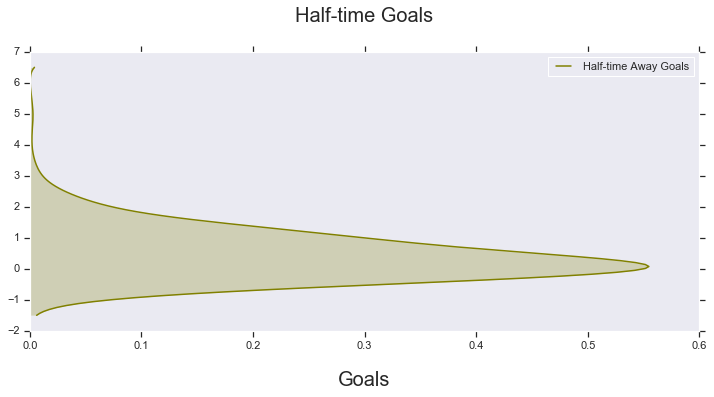

In [11]:
sns.set_style('dark')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.kdeplot(df1['Half-time Away Goals'], shade=True, bw=.5, vertical=True, color='olive')

plt.xlabel('Goals', labelpad=20)
plt.title('Half-time Goals', y=1.09)

### Pros & Cons
+ Pros: If the variable were somehow related to height, this would be a good representation.
- Cons: Again, there is little context without additional variables.

### 1.4 Violinplot - Attendance

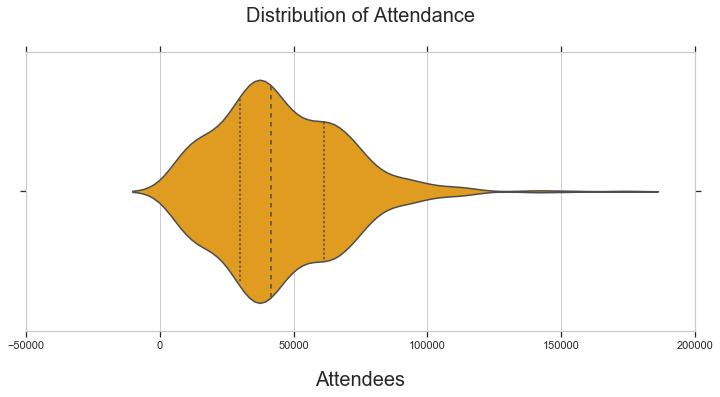

In [12]:
sns.set_style('whitegrid')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.violinplot(y=df1['Attendance'], inner='quartile', orient='h', color='orange')

plt.xlabel('Attendees', labelpad=20)
plt.title('Distribution of Attendance', y=1.09)

### Pros & Cons
+ Pros: The quartile markers provide a good representation.
- Cons: If there are too many data points the 'sticks' are not necessarily helpful.

# 2. Three - Two Variables (Video Game Data)

### 2.1 Scatterplot - Japanese & EU Sales

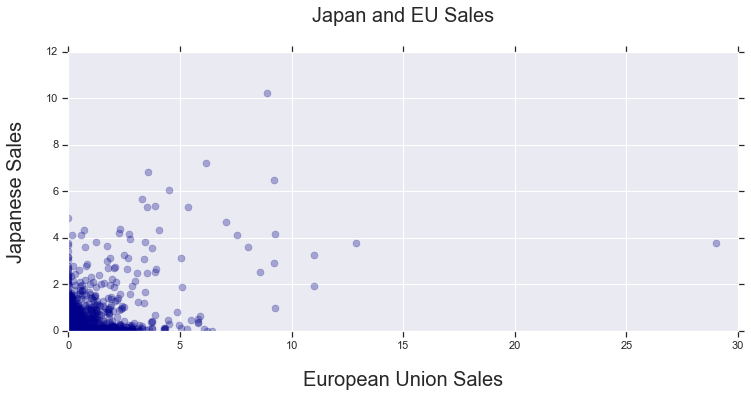

In [13]:
sns.set_style('darkgrid')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.regplot(x=df4['EU_Sales'], y=df4['JP_Sales'], fit_reg=False,
            scatter_kws={'color':'darkblue','alpha':0.3,'s':50} )

plt.xlim(0, 30)
plt.ylim(0, 12)
plt.xlabel('European Union Sales', labelpad=20)
plt.ylabel('Japanese Sales', labelpad=20)
plt.title('Japan and EU Sales', y=1.09)

### Pros & Cons
+ Pros: The visual overlap of data points is likely useful.
- Cons: This set is probably best when a data set doesn't have many outliers.

### 2.2 Two Line Chart - Japanese & EU Sales Share of Global Sales

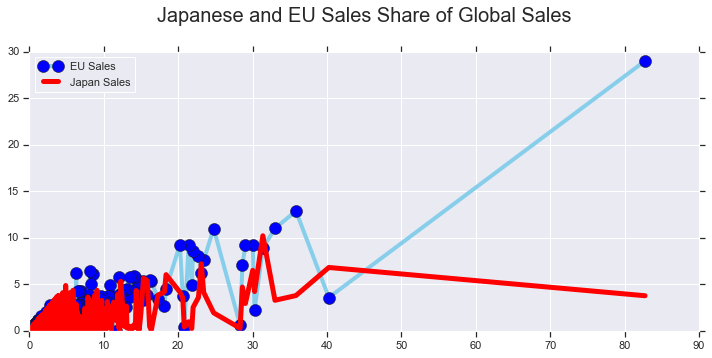

In [14]:
sns.set_style('darkgrid', {'xtick.major.size': 0.2})
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

plt.figure(figsize=(12,5))
plt.title('Japanese and EU Sales Share of Global Sales', y=1.09)

p1 = plt.plot( 'Global_Sales', 'EU_Sales', data=df4, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
p2 = plt.plot( 'Global_Sales', 'JP_Sales', data=df4, marker='', color='Red', linewidth=5)

plt.legend((p1[0], p2[0]), ('EU Sales', 'Japan Sales'), loc=2)

### Pros & Cons
+ Pros: This is probably most useful for data over time.
- Cons: It is hard to consider any data comparisson outside of correlation with a chart like this.

### 2.3 Histogram - Japanese & EU Sales

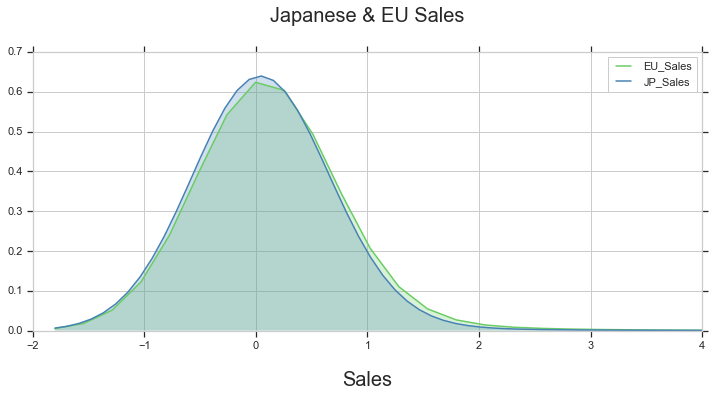

In [15]:
sns.set_style('whitegrid')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.kdeplot(df4['EU_Sales'], shade=True, bw=.6, color='g')
sns.kdeplot(df4['JP_Sales'], shade=True, bw=.6, color='steelblue')

plt.xlim(-2, 4)
plt.xlabel('Sales', labelpad=20)
plt.title('Japanese & EU Sales', y=1.09)

### Pros & Cons
+ Pros: Histograms can contain a lot of information - comparing 't' and 'p' values would be useful.
- Cons: If bot distributions are normal, the visual comparison isn't very useful.

# 3. Six - One Continuous and One Categorical Variable (World Cup Data)

### 3.1 Catplot Bar - Total Matches by Year

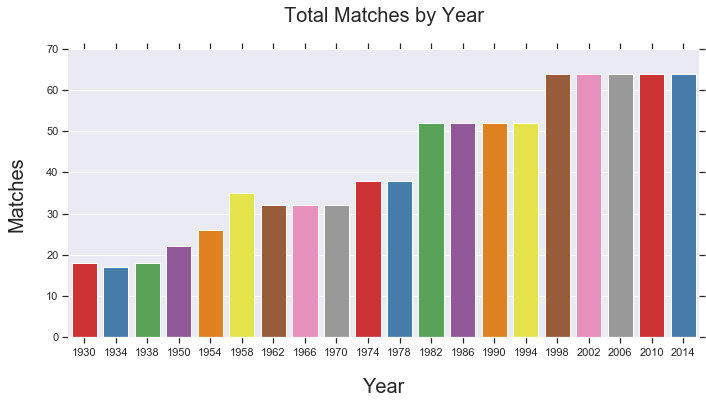

In [16]:
sns.set()
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

ax = sns.catplot(x='Year', y='MatchesPlayed', data=df3, aspect=1.95, kind='bar', palette='Set1', ci=None, dodge=False)
ax.despine(left=True)
ax.set_ylabels('Matches')

plt.title('Total Matches by Year', y=1.08)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Matches', labelpad=20)

### Pros & Cons
+ Pros: The data is very clear and visually pleasing.
- Cons: The information in this plot is somewhat simple and limited.

### 3.2 Catplot Box - Attendance by Year (1930 - 1978)

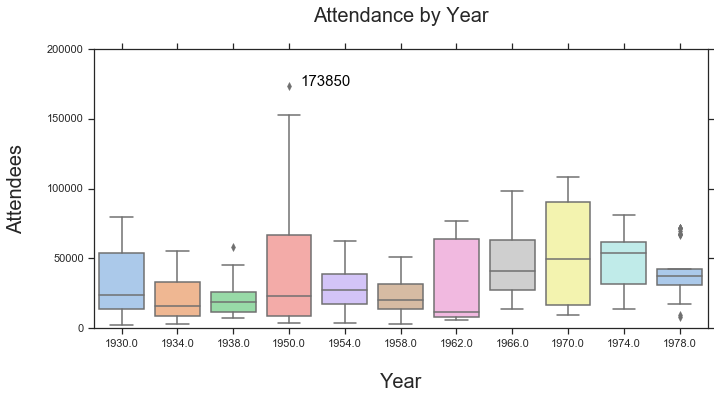

In [17]:
sns.set_style('white')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

fig, ax = plt.subplots(figsize=(11,5))
ax.xaxis.set_label_coords(0.5,-0.16)
ax.yaxis.set_label_coords(-0.11,0.5)

sns.boxplot(x=df1[df1['Year'] <= 1978]['Year'], y='Attendance', data=df1, palette='pastel', ax=ax)

max_attn = df1.loc[df1['Attendance'].idxmax()]['Attendance']
max_year = df1.loc[df1['Attendance'].idxmax()]['Year']

plt.ylim(0, 200000)
sns.set_context(rc={'axes.labelsize':15})
plt.text(3+0.2, max_attn, int(max_attn), horizontalalignment='left', size=15, color='black')

plt.ylabel('Attendees')
plt.title('Attendance by Year', y=1.08)

### Pros & Cons
+ Pros: There is a lot of information contained in each plot.
- Cons: Data proportions can be distoreted by plot visuals.

### 3.3 Catplot Swarm - Attendance by Year (1930 - 1978)

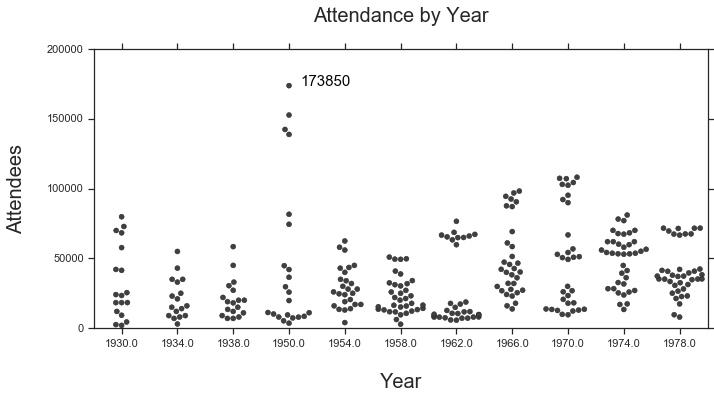

In [18]:
sns.set_style('white')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

fig, ax = plt.subplots(figsize=(11,5))
ax.xaxis.set_label_coords(0.5,-0.16)
ax.yaxis.set_label_coords(-0.11,0.5)

sns.swarmplot(x=df1[df1['Year'] <= 1978]['Year'], y='Attendance', data=df1, color='.25', linewidth=0.5, ax=ax)

max_attn = df1.loc[df1['Attendance'].idxmax()]['Attendance']
max_year = df1.loc[df1['Attendance'].idxmax()]['Year']

plt.ylim(0, 200000)
sns.set_context(rc={'axes.labelsize':15})
plt.text(3+0.2, max_attn, int(max_attn), horizontalalignment='left', size=15, color='black')

plt.ylabel('Attendees')
plt.title('Attendance by Year', y=1.08)

### Pros & Cons
+ Pros: It is helpful to see shapes *and* individual data points.
- Cons: Swarmplots can be visually noisy.

### 3.4 Scatterplot with Line - Yearly Goals Scored

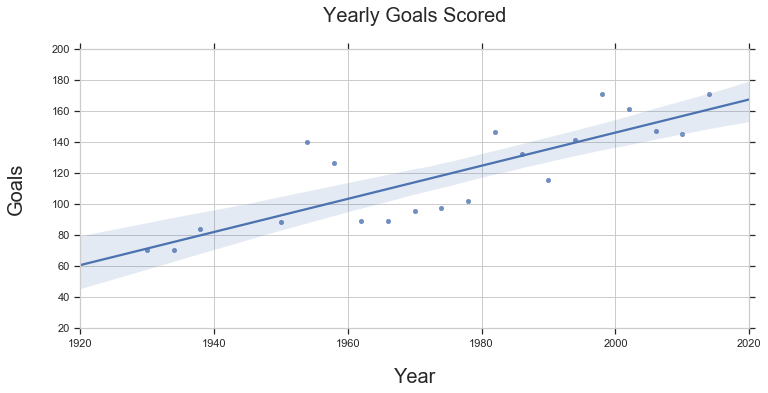

In [19]:
sns.set_style('whitegrid')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

plt.figure(figsize=(12,5))

ax = sns.regplot(x=df3['Year'], y=df3['GoalsScored'], data=df3)
ax.set(xlabel='Year', ylabel='Goals')
ax.xaxis.set_label_coords(0.5,-0.14)
ax.yaxis.set_label_coords(-0.08,0.5)

plt.title('Yearly Goals Scored', y=1.08)

### Pros & Cons
+ Pros: A scatterplot is easy to understand.
- Cons: Perhaps there isn't enough information conveyed.

### 3.5 Stacked Chart - EU and Japan Share of Global Sales by Games (Video Game Data)

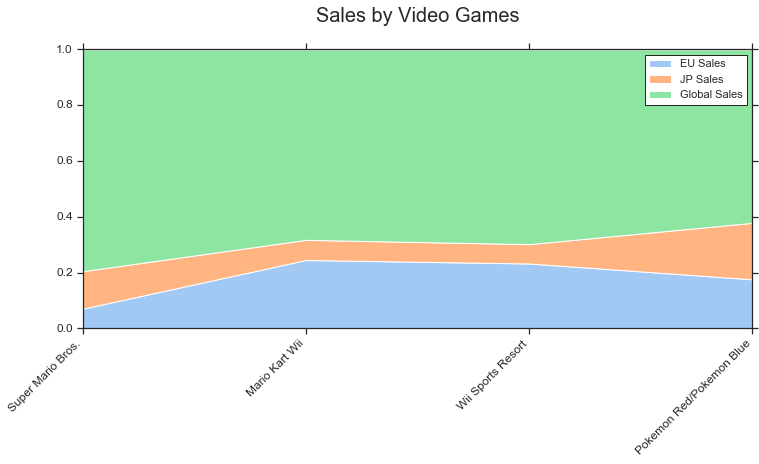

In [45]:
sns.set(style='white')
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})

plt.figure(figsize=(12,5))

df5 = df4[['EU_Sales', 'JP_Sales', 'Global_Sales']]
df6 = df5.divide(df5.sum(axis=1), axis=0)
 
col = sns.color_palette('pastel')
plt.stackplot(range(1,5), df6[1:5]['EU_Sales'], df6[1:5]['JP_Sales'], df6[1:5]['Global_Sales'],
              labels=['EU Sales','JP Sales','Global Sales'], colors = col)

plt.legend()
plt.margins(0,0)
plt.title('Sales by Video Games', y=1.08)

fontsize = 12
t = np.arange(1, 5.0, 1)
xticklabels = [df4[1:2]['Name'][1], df4[2:3]['Name'][2], df4[3:4]['Name'][3], df4[4:5]['Name'][4], df4[5:6]['Name'][5]]

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xticks(range(1, len(t) + 1))
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xticklabels(xticklabels, rotation = 45, ha='right')
fig.savefig('test_rotation.png', dpi=300, format='png', bbox_inches='tight')

### Pros & Cons
+ Pros: A stacked plot can be good for comparison.
- Cons: The comparison, however, is best over time periods. Various categories don't work as well (as we can see).

### 3.6 Grouped Barplots - Sales by Games (Student Alcohol Consumption Data)

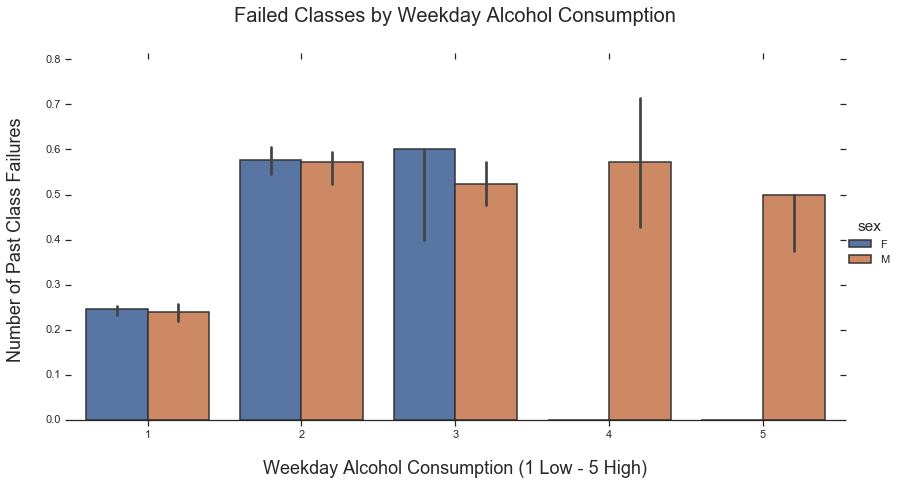

In [24]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':18})

ax = sns.catplot(x='Dalc', y='failures', hue='sex', data=df_stu,
                height=6, linewidth=1.5, edgecolor='.2', kind='bar', aspect=1.95, palette='deep', ci=20)

ax.despine(left=True)
ax.set_xlabels('Weekday Alcohol Consumption (1 Low - 5 High)', labelpad=20)
ax.set_ylabels('Number of Past Class Failures', labelpad=20)
plt.title('Failed Classes by Weekday Alcohol Consumption', y=1.09)

### Pros & Cons
+ Pros: Grouped bar plots allow for good comparisons.
- Cons: Again, the axes scales can easily change how the data is interpreted and understood.

# 4. Challenge - Master Plot

### 4.1 Lineplot - Student Behavior by Age (Student Alcohol Consumption Data)

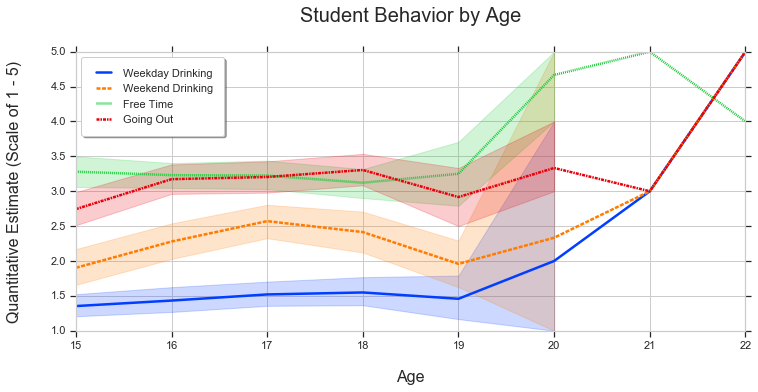

In [66]:
sns.set(style="whitegrid")
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':16})

plt.figure(figsize=(12,5))

df_stu_sorted = df_stu.sort_values(by=['age'])
df_stu_2 = df_stu_sorted[['age', 'Dalc', 'Walc', 'freetime', 'goout']]
df_stu_3 = pd.DataFrame(df_stu_2[['Dalc', 'Walc', 'freetime', 'goout']].values,
                        df_stu_2['age'], columns=['Dalc', 'Walc', 'freetime', 'goout'])

ax = sns.lineplot(data=df_stu_3, palette='bright', linewidth=2.5)

ax.set(xlabel='Age', ylabel='Quantitative Estimate (Scale of 1 - 5)')
ax.xaxis.set_label_coords(0.5,-0.14)
ax.yaxis.set_label_coords(-0.08,0.5)
ax.legend(['Weekday Drinking', 'Weekend Drinking', 'Free Time', 'Going Out'],
          loc=2, fancybox=True, shadow=True, borderpad=1)

plt.title('Student Behavior by Age', y=1.09)

### Description
+ The lineplot shows that all variables increase with student age, but habitual drinking most of all. Even weekday drinking rises to the level of weekend drinking by the age of 21. Oddly enough drinking increases even as free time decreases by age 22.